# Structured AntiBody DataBase

This Dataset contains antobody strucutres as well as antibody-antigen compexes.

We downloaded only the Complexes with Affinity data (Acess on 30.4.2022)

The data is taken from http://opig.stats.ox.ac.uk/webapps/newsabdab/sabdab/search/?ABtype=All&method=All&species=All&resolution=&rfactor=&antigen=All&ltype=All&constantregion=All&affinity=True&isin_covabdab=All&isin_therasabdab=All&chothiapos=&restype=ALA&field_0=Antigens&keyword_0=#downloads


In [1]:
import pandas as pd
import yaml
import os

In [2]:
from abag_affinity.utils.config import read_config, get_resources_paths

In [3]:
config = read_config("../../config.yaml")
summary_path, pdb_path = get_resources_paths(config, "SAbDab")

In [4]:
summary_df = pd.read_csv(summary_path, sep="\t")
summary_df

,pdb,Hchain,Lchain,model,antigen_chain,antigen_type,antigen_het_name,antigen_name,short_header,date,...,scfv,engineered,heavy_subclass,light_subclass,light_ctype,affinity,delta_g,affinity_method,temperature,pmid
0,1mhh,D,C,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,08/20/02,...,False,False,IGHV9,IGKV8,Kappa,1.000000e-09,-12.278197,Unknown,NaN,TBD
1,1mhh,B,A,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,08/20/02,...,False,False,IGHV9,IGKV8,Kappa,1.000000e-09,-12.278197,Unknown,NaN,TBD
2,1hh9,B,A,0,C,peptide,NaN,pep-2,IMMUNE SYSTEM/PEPTIDE,12/21/00,...,False,False,IGHV1,IGKV14,Kappa,1.000000e-05,NaN,Other,4,10990450
3,1mh5,H,L,0,H,Hapten,HAL,N-{[2-({[1-(4-CARBOXYBUTANOYL)AMINO]-2-PHENYLE...,IMMUNE SYSTEM,08/19/02,...,False,True,IGHV1,IGKV2,Kappa,6.100000e-10,-12.571059,Unknown,NaN,TBD
4,1mh5,B,A,0,B,Hapten,HAL,N-{[2-({[1-(4-CARBOXYBUTANOYL)AMINO]-2-PHENYLE...,IMMUNE SYSTEM,08/19/02,...,False,True,IGHV1,IGKV2,Kappa,6.100000e-10,-12.571059,Unknown,NaN,TBD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,4d9q,H,L,0,A,protein,NaN,factor d,HYDROLASE/IMMUNE SYSTEM,01/11/12,...,False,True,IGHV7,IGKV1,Kappa,3.000000e-11,-14.355775,SPR,NaN,TBD
1322,6azl,B,A,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,09/11/17,...,False,True,IGHV2,IGKV5,Kappa,1.180000e-05,-6.723156,Unknown,NaN,TBD
1323,6azl,D,C,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,09/11/17,...,False,True,IGHV2,IGKV5,Kappa,1.180000e-05,-6.723156,Unknown,NaN,TBD
1324,6azk,B,A,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,09/11/17,...,False,True,IGHV2,IGKV5,Kappa,2.300000e-06,-7.691979,Unknown,NaN,TBD


In [5]:
summary_df.columns

Index(['pdb', 'Hchain', 'Lchain', 'model', 'antigen_chain', 'antigen_type',
       'antigen_het_name', 'antigen_name', 'short_header', 'date', 'compound',
       'organism', 'heavy_species', 'light_species', 'antigen_species',
       'authors', 'resolution', 'method', 'r_free', 'r_factor', 'scfv',
       'engineered', 'heavy_subclass', 'light_subclass', 'light_ctype',
       'affinity', 'delta_g', 'affinity_method', 'temperature', 'pmid'],
      dtype='object')

In [6]:
summary_df.describe()

,model,resolution,affinity,delta_g
count,1326.0,1326.000000,1.326000e+03,1289.000000
mean,0.0,2.558300,2.324213e-06,-11.034606
std,0.0,0.650745,1.685510e-05,2.098564
min,0.0,1.000000,4.000000e-13,-16.913816
25%,0.0,2.118000,1.000000e-09,-12.340621
50%,0.0,2.501500,8.365000e-09,-11.053614
75%,0.0,2.890000,9.175000e-08,-9.690000
max,0.0,6.980000,2.000000e-04,-5.040000


In [7]:
print("Total Number of entries in table", len(summary_df))
print("Number of unique PDB IDs", len(summary_df["pdb"].unique()))

Total Number of entries in table 1326
Number of unique PDB IDs 746


In [8]:
summary_df["antigen_type"].value_counts()

protein                                       796
peptide                                       239
Hapten                                        117
protein | protein                              39
carbohydrate                                   33
nucleic-acid                                   11
protein | peptide                               9
carbohydrate | protein                          1
carbohydrate | protein | protein                1
nucleic-acid | nucleic-acid | nucleic-acid      1
peptide | peptide | peptide                     1
Name: antigen_type, dtype: int64

## Comparison bewtween Affinity (Kd) and Delta G

<AxesSubplot:xlabel='affinity', ylabel='delta_g'>

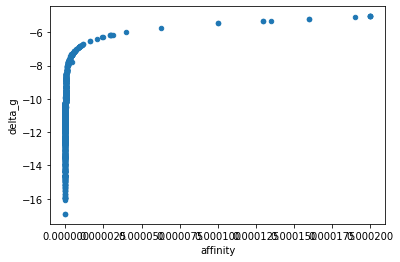

In [9]:
summary_df.plot.scatter("affinity", "delta_g")

Logarithmic relationship